# Mini-Project Submission: Basic Solution

# 1 Author

**Student Name**: Somil Parmar

# 2 Problem Formulation

People may hum or whistle songs that are 'stuck in their  head' but not recall the actual name of them. Searching for such a song may prove difficult, without a machine learning solution. Here we attempt to build a relatively small scale pipeline, which experiments with two distinct songs.

Specifically, the problem involves building a machine learning pipeline to predict the labels of audio segments from the Harry Potter theme song ("Potter") and The Imperial March ("StarWars"). The segments are approximately 15 seconds in length, and include two types of interpretation: humming and whistling.

It will be interesting to see how well the models are able to predict the song labels, based on certain features that will be extracted from them. 

# 3 Machine Learning Pipeline

The machine learning pipeline will involve the following stages:
1. Data ingestion (importing the raw data)
1. Data preprocessing (obtaining relevant labels)
1. Feature extraction
1. Model training
1. Candidate model evaluation

The output will be a song label ("False" for "Potter" and "True" for StarWars).

# 4 Transformation Stage

Following experimentation with 9 different features (see Appendix), three were selected for training of the model. These features speed up computation time, enable us to reduce overfitting (as there should be less redundant data) and improve accuracy.

1. Tempogram standard deviation - measures the rate of a musical beat in beats per minute. It indicates the 'pace' or tempi at a specific moment in time. As it returns a lot of values, we will be using the standard deviation of this feature to represent the variability.
2. Tempo - similar to the tempogram; represents the speed of a musical piece in beats per minute.
3. Pitch standard deviation - a property that orders sounds on a relative frequency scale (decribed as "lower" or "higher" notes). These features will allow us capture the variability of the pitch.

As the features will have varying scales, thus we will use standardisation (using the Z-score) after splitting the data to ensure that inputs are treated equally. This will be done after splitting the data for building models.

Overall, our input will be the original audio files, from which we will extract the tempogram standard deviation, tempo and pitch standard deviation.

# 5 Modelling

The following four supervised models will be implemented, all of which are suitable for classification problems:

1) Logistic regression
* This is used when the target variable is categorical, since linear regression (which is susceptible to outliers) would not be appropriate. Based on a threshold value, we can classify output into the two classes (Potter or StarWars). We explore a range of values for the regularisation parameter (C) which helps to control overfitting (higher values give more weight to the training data).

2) Support vector machine (SVM)
* This method aims to find an optimal hyperplane boundary between our possible outputs (which maximises the distance to support vectors, unlike logistic regression). We explore a range of values for the regularisation parameter (C) - higher values lead to a smaller margin hyperplane.

3) K-Nearest Neighbours (kNN)
* This classification method determines the class of a data point by considering $k$ nearest points. It works differently to the above in that predictions are made based on the majority class amongst the $k$ nearest neighbours. We could expect audio files of the same class to be grouped together in the feature space, which is why we have chosen this model.
* A value of  $k$ that is too small is more likely to be sensitive to noise and can lead to overfitting. A value that is too large can cause generalisation and result in underfitting. We explore a range of values that does not include 1.

4) Random forest classifier
* This model consists of a large number of decision trees, which all cast a vote for the class prediction (the most votes decides the classification). In contrast to the other models above, this method can form more "complex" decision boundaries which I anticipate could improve performance. 
* However, it is prone to overfitting, so we can explore several hyperparameters (number of trees, features to consider at each split, maximum levels in a tree, minimum samples required for a node split and minimum samples required at each leaf node).

# 6 Methodology

* Initially, the dataset will be randomly split into training and validation sets using a ratio of 70:30 respectively. 

* We will perform hyperparameter tuning (using the training set only) on the first three models using the grid search technique to obtain an optimal value of C (for logistic regression and SVM) and $k$ (for kNN). This performs an exhaustive search on pre-defined parameters of a model, and computes the optimum values of the hyperparameters to give the best model performance. It also employs a K-Fold cross validator, similar to that explained below.


* For the random forest, we will use a random search technique for hyperparameter tuning, as there are many parameters; a grid search would be time-consuming and computationally expensive. In order to reduce overfitting, we will explore a range of parameters specified in the previous section.

* Subsequently we will generate the training, validation accuracies and confusion matrices using the 70:30 split.

* The K-fold cross-validation procedure will also be used to estimate the performance of the models. This method will help to reduce the bias of the model skill, as it returns a mean of the model accuracies. We need to choose an appropriate value of $k$ such that each group is large enough to statistically represent the dataset. As we have over 800 audio files, an appropriate value of $k$ could be 10. This will reserve 10% of the dataset for validation purposes.

# 7 Dataset

## 7.1  Preparing the Dataset

As shown below, there are 824 audio files in total (obtained from both parts 1 and 2), consisting of both "Potter" and "StarWars" hums and whistles recordings. However, we are not sure if there are an equal number of both songs, and not all of the recordings follow a consistent file naming format.


In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os, sys, re, pickle, glob
import IPython.display as ipd
from tqdm import tqdm
import librosa
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Load the files
sample_path = '/content/drive/MyDrive/Data/MLEndBasic/audio/*.wav'
files = glob.glob(sample_path)
len(files)

824

We will begin by exploring the audio files. The code below identifies all the filenames in this dataset that do not follow the consistent naming format.

In [ ]:
# Identify files that do not meet the desired naming convention
for file in files:
  file_name = file.split('/')[-1]
  if not re.match("S[0-9]+_(hum|whistle)_\d_(StarWars|Potter)\.wav", file_name):
    print(file_name)

S8_hum_1_[Potter].wav
S8_hum_4_[Potter].wav
S10_hum_1_Potter .wav
S10_hum_2_Potter .wav
S12_hum_2_Potter .wav
S12_hum_4_Potter .wav
S18_Hum_2_Potter.wav
S18_Whistle_2_Potter.wav
S29_whistle_2_potter.wav
S35_hum_1_[Potter].wav
S35_hum_4_[Potter].wav
S37_hum_1_[Potter].wav
S37_whistle_1_[Potter].wav
S38_hum_3_Potterwav.wav
S40_hum_2_potter.wav
S40_whistle_2_potter.wav
S47_hum_1_potter.wav
S47_hum_2_potter.wav
S48_Hum_2_Potter.wav
S48_Whistle_2_Potter.wav
S49_hum_1_[potter].wav
S49_hum_4_[potter].wav
S55_harrypotter_hum_2.wav
S55_harrypotter_whistle_1.wav
S60_hum_1_[Potter].wav
S60_whistle_1_[Potter].wav
S61_hum_1_[Potter].wav
S61_whistle_1_[Potter].wav
S63_hum_1_[Potter].wav
S63_hum_4_[Potter].wav
S79_hum_1_[Potter].wav
S79_hum_4_[Potter].wav
S82_hum_1_[Potter].wav
S82_hum_4_[Potter].wav
S88_hum_1_[potter].wav
S88_whistle_1_[potter].wav
S92_Hum_2_Potter.wav
S92_Whistle_2_Potter.wav
S95_Hum 2 Potter.wav
S95_Whistle 2 Potter.wav
S96_hum_1_[Potter].wav
S96_whistle_1_[Potter].wav
S99_hum_1_[

It is evident that all the audio files relating to the "Potter" song contain this string, ignoring differences in capitalisation. The dataframe below assigns the correct song label to each file based on this assumption.

In [ ]:
# Obtain a list and dataframe of file_id's
PotterStar_table = []

for file in files:
  file_name = file.split('/')[-1]
  PotterStar_table.append([file_name])

PotterStar_df = pd.DataFrame(PotterStar_table,columns=['file_id'])

# Get the label of the file
def get_labels(row):
  if re.search("Potter", row["file_id"], re.IGNORECASE):
    return "Potter"
  else:
    return "StarWars"

PotterStar_df_labelled = PotterStar_df.assign(song_label = PotterStar_df.apply(get_labels, axis=1))

PotterStar_df_labelled = PotterStar_df_labelled.set_index('file_id')
PotterStar_df_labelled

,song_label
file_id,
S1_hum_2_Potter.wav,Potter
S1_whistle_2_Potter.wav,Potter
S2_hum_2_Potter.wav,Potter
S2_whistle_2_Potter.wav,Potter
S3_hum_1_Potter.wav,Potter
...,...
S219_hum_4_StarWars.wav,StarWars
S221_hum_1_StartWars.wav,StarWars
S221_hum_2_StarWars.wav,StarWars


Based on this dataframe, we perform a check to see if the dataset is balanced. As can be seen below, there are almost equal counts for each song label (there are two more "StarWars" recordings). Therefore, there is no need to further balance the dataset.

In [ ]:
# Checking class balance
PotterStar_df_labelled.song_label.value_counts()

StarWars    413
Potter      411
Name: song_label, dtype: int64

## 7.2 Feature Extraction

The following code extracts the three features for each of the audio files.

In [ ]:
# Feature extraction
def getPitch(x,fs,winLen=0.02):
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

def get_features(files,labels_file):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    yi = labels_file.loc[fileID]['song_label']=="StarWars" # True if the song label is StarWars

    fs = None
    x, fs = librosa.load(file,sr=fs)
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    hop_length = 512
    oenv = librosa.onset.onset_strength(y=x, sr=fs, hop_length=hop_length)
    tempogram_std = np.std(librosa.feature.tempogram(onset_envelope=oenv, sr=fs, hop_length=hop_length))
    tempo = np.mean(librosa.beat.tempo(x))
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0

    xi = [tempogram_std,tempo,pitch_std]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

X, y = get_features(files, labels_file=PotterStar_df_labelled)

100%|██████████| 824/824 [48:14<00:00,  3.51s/it]


Since these features were extracted previously, they were saved to reduce computation time. We can confirm the shape of the data is correct.

In [ ]:
# Using numpy to save our features (already done)

# from numpy import asarray
# from numpy import savetxt
# savetxt('data_basic_x_stdx2.csv', X, delimiter=',')
# savetxt('data_basic_y_stdx2.csv', y, delimiter=',')

# Loading the csv files containing our data
from numpy import loadtxt
X = loadtxt('data_basic_x_stdx2.csv', delimiter=',')
y = loadtxt('data_basic_y_stdx2.csv', delimiter=',')

print("The shape of the predictor array is: ", X.shape)
print("The shape of the labels array is: ", y.shape)

The shape of the predictor array is:  (824, 3)
The shape of the labels array is:  (824,)


## 7.3 Visualising the Audio Files in Space

The 3D plot below shows the relative positions of the audio files, as given by the 3 features (note that they have not yet been normalised). As we can see, a lot of the points are not visually very well-separated, which may suggest that out models could struggle to separate the classes.

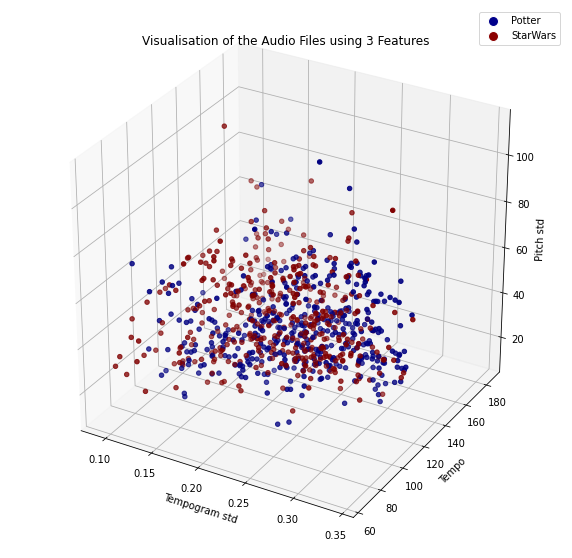

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Generate a dataframe with predictors and labels
features_df = pd.DataFrame(X)
features_labels = pd.concat((features_df, pd.DataFrame({'y': y})), axis=1)

# Plot the features
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111, projection='3d')

colour_dict = {0:'r', 1:'b'}

ax1.scatter(features_labels.iloc[:, 0], features_labels.iloc[:, 1], features_labels.iloc[:, 2], c=features_labels['y'], cmap='jet')

ax1.set_title("Visualisation of the Audio Files using 3 Features")    
ax1.set_xlabel("Tempogram std")
ax1.set_ylabel("Tempo")
ax1.set_zlabel("Pitch std")


legend_elements = [Line2D([0],[0], marker='o', color='white', label='Potter', markerfacecolor='darkblue', markersize=10),
                   Line2D([0],[0], marker='o', color='white', label='StarWars', markerfacecolor='darkred', markersize=10)]


ax1.legend(handles=legend_elements, loc='upper right')

# 8 Results

The data is split 70:30, using stratification to ensure balance of the labels in the training and validation sets. We then normalise predictors using the standard scaler.

## 8.1 Logistic Regression

The results of fitting the logistic regression model are as follows. We first explore different values of C using the grid search method.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Split the dataset, stratify by label y to ensure balance
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=5, stratify=y)

# Standardise the train and validation features
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_val_norm = sc.transform(X_val)

# Perform grid search on the X_train set for optimal value of C
pipeline_logreg = Pipeline([('scale', sc), ('estimator', LogisticRegression())])
params_grid_logreg = {'estimator__C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 25, 50, 100]}
grid_logreg = GridSearchCV(pipeline_logreg, params_grid_logreg, cv=10)
grid_logreg.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'
 .format(grid_logreg.best_params_))

Best hyperparameter setting: {'estimator__C': 0.001}.


Training Accuracy 0.6440972222222222
Validation Accuracy 0.7056451612903226


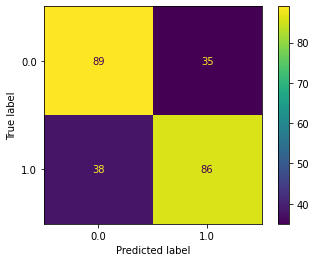

In [ ]:
# Fit the model to the training set using the best hyperparameter
logreg = LogisticRegression(C=0.001)
logreg.fit(X_train_norm, y_train)

# Obtain predictions
yt_pred=logreg.predict(X_train_norm)
yv_pred=logreg.predict(X_val_norm)

print('Training Accuracy', np.mean(yt_pred==y_train))
print('Validation Accuracy', np.mean(yv_pred==y_val))

# Generate confusion matrix for the validation set
ConfusionMatrixDisplay.from_predictions(y_val, yv_pred)

We can see that the model is not exceptionally good at correctly predicting the song labels; the validation accuracy is approximately 71%. The validation accuracy is higher than the training accuracy, which shows that overfitting has not occurred.

The confusion matrix shows that most of the "Potter" and "StarWars" audio files ('True label': 0 and 1 respectively) the majority of them are correctly classified. However, a large portion are still misclassified in both classes (approximately a third). Relatively more of the "StarWars" appear to be misclassified (38/124 compared to 35/124 Potter), which may suggest that this model is better at predicting "Potter" labels.

## 8.2 Support Vector Machine

The results of fitting the SVM model are as follows. First, we use the grid search method to find an optimal value of C.

In [ ]:
# Perform grid search on the X_train set for optimal value of C
pipeline_svm = Pipeline([('scale', sc), ('estimator', svm.SVC())])
params_grid_svc = {'estimator__C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 25, 50, 100]}
grid_svc = GridSearchCV(pipeline_svm, params_grid_svc, cv=10)
grid_svc.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'
 .format(grid_svc.best_params_))

Best hyperparameter setting: {'estimator__C': 10}.


Training Accuracy 0.7395833333333334
Validation Accuracy 0.717741935483871


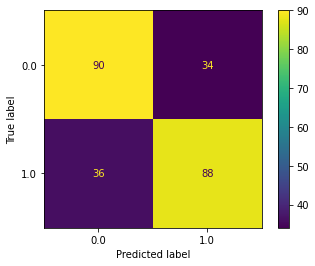

In [ ]:
# Fit the model to the training set using the best value of C
svc = svm.SVC(C=10)
svc.fit(X_train_norm,y_train)

# Obtain predictions
yt_pred = svc.predict(X_train_norm)
yv_pred = svc.predict(X_val_norm)

print('Training Accuracy', np.mean(yt_pred==y_train))
print('Validation Accuracy', np.mean(yv_pred==y_val))

# Generate confusion matrix for the validation set
ConfusionMatrixDisplay.from_predictions(y_val, yv_pred)

The SVM appears to perform (marginally) better than the logistic regression based on the validation accuracy. The training accuracy is higher (suggesting more overfitting) than the validation accuracy, suggesting insignificant overfitting.

The confusion matrix also shows that most of the "Potter" and "StarWars" audio files are correctly classified as having their true labels. Very slightly more of the "StarWars" (36/124) audio files appear to be misclassified relative to "Potter" (34/124).

## 8.3 k-Nearest Neighbours

We will now fit the kNN model, using the grid search method to find the optimal value of $k$.

In [ ]:
# Perform grid search on the X_train set for optimal value of k
pipeline_knn = Pipeline([('scale', sc), ('estimator', KNeighborsClassifier())])
params_grid_knn = {'estimator__n_neighbors': np.arange(2,21)}
knn_grid = GridSearchCV(pipeline_knn, params_grid_knn, cv=10)
knn_grid.fit(X_train, y_train)

print("The best value of k is: ", knn_grid.best_params_)

The best value of k is:  {'estimator__n_neighbors': 9}


Training Accuracy 0.75
Validation  Accuracy 0.7217741935483871


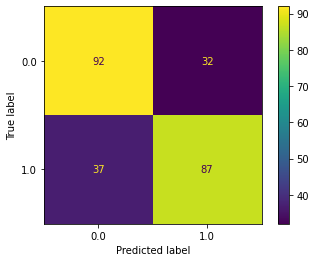

In [ ]:
# Fit the model to the training set using the best value of k
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_norm, y_train)

# Obtain predictions
yt_p = knn.predict(X_train_norm)
yv_p = knn.predict(X_val_norm)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

# Generate confusion matrix for the validation set
ConfusionMatrixDisplay.from_predictions(y_val, yv_p)

We can see that the validation accuracy places this model above the logistic regression and support vector machine in terms of performance. The training accuracy is also higher, but the difference between them does not suggest major overfitting.

Similarly to the previous models, we can see that although most of the files are correctly classified, relatively more of the "StarWars" (37/124 vs 32/124) are mistaken for "Potter".

## 8.4 Random Forest

We now fit a random forest classifier. Instead of using the grid search, we use a random search to reduce computation time. Note that, due to the "random" nature of this method, it is likely to return different values each time.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Perform grid search on the X_train set for optimal estimator values
pipeline_rfc = Pipeline([('scale', sc), ('estimator', RandomForestClassifier())])
params_grid_rfc = {'estimator__n_estimators': [100, 200, 300, 400, 500], # Number of trees in the random forest
                   'estimator__max_features': ['auto', 'sqrt'], # Number of features to consider at each split
                   'estimator__max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], # Maximum number of levels in the tree
                   'estimator__min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
                   'estimator__min_samples_leaf': [1, 2, 4]} # Minimum number of samples required at each leaf node

rfc_grid = RandomizedSearchCV(pipeline_rfc, params_grid_rfc, cv=10)
rfc_grid.fit(X_train, y_train)

print("The best estimators are: ", rfc_grid.best_params_)

The best estimators are:  {'estimator__n_estimators': 100, 'estimator__min_samples_split': 2, 'estimator__min_samples_leaf': 4, 'estimator__max_features': 'auto', 'estimator__max_depth': 100}


Training Accuracy 0.8420138888888888
Validation  Accuracy 0.7258064516129032


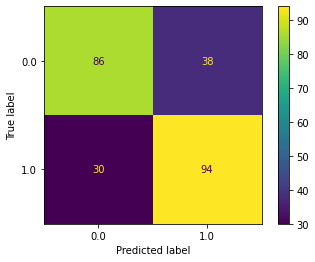

In [ ]:
# Fit the model to the training set using the above estimators
rfclf = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=4,  max_features='auto', max_depth=100, random_state=10)
rfclf.fit(X_train_norm, y_train)

# Obtain predictions
yt_p = rfclf.predict(X_train_norm)
yv_p = rfclf.predict(X_val_norm)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

# Generate confusion matrix for the validation set
ConfusionMatrixDisplay.from_predictions(y_val, yv_p)

We can see that the validation accuracy places this model ahead of all the other models. However, it also appears to be the most overfit (indicated by the relatively large difference in training and validation accuracies) - but this may be expected for a relatively complex classifier.

Interestingly, this model proportionately misclassifies more of the "Potter" (38/124) files in comparison to the "StarWars" (30/124), which is the opposite to results seen with other models.

## 8.5 K-Fold Cross-validation

The results above for all three models are specific to a particular 70:30 split of the data. In order to obtain a less biased result, we can use the K-Fold cross-validation technique (as described earlier). This will split the data into 10 folds, and each fold will be used for validation. The score returned is an average of all the model accuracies. Note that this method does not shuffle the data by default, so we have set this parameter to true.

In [ ]:
# Split the data into 10 folds, with shuffling
kf = KFold(10, shuffle=True, random_state=10)

# Ensure normalisation of the resulting train/validation sets and fit model using hyperparameters specified previously
pipeline_logreg = Pipeline([('transformer', sc), ('estimator', logreg)])
pipeline_svm = Pipeline([('transformer', sc), ('estimator', svc)])
pipeline_knn = Pipeline([('transformer', sc), ('estimator', knn)])
pipeline_rfc = Pipeline([('transformer', sc), ('estimator', rfclf)])

# Obtain the accuracy across folds (using all X and y)
svc_score = cross_val_score(pipeline_svm, X, y, cv=kf)
logreg_score = cross_val_score(pipeline_logreg, X, y, cv=kf)
knn_score = cross_val_score(pipeline_knn, X, y, cv=kf)
rfc_score = cross_val_score(pipeline_rfc, X, y, cv=kf)

print("Logistic Regression:", np.mean(logreg_score), ", SVM:", np.mean(svc_score), ", kNN:", np.mean(knn_score), "Random Forest", np.mean(rfc_score))

Logistic Regression: 0.6552453717308258 , SVM: 0.7111225389362327 , kNN: 0.7026741110784601 Random Forest 0.7208933294152218


Comparing the validation accuracy of the 70:30 split to the results of K-fold above, we can see that the overall validation accuracies are lower. These differences may be expected, since the K-fold considers the average accuracy using many splits, as opposed to one.

It would seem that the logistic regression performs the worst of all the models. The performance of the other three models is similar, with random forest being slightly better.

# 9 Conclusions

The findings of our experiments are summarised below:
* Neither of the models perform very well; the validation accuracies are only just above 70% using the 70:30 split, despite some hyperparameter tuning.
* Using the K-fold cross validation technique to reduce bias, we confirmed that the random forest appears to perform better with a score of approximately 72%. This is followed closely by the SVM and kNN. The logistic regression shows relatively worse performance.
* There is a general trend across the models (except for the random forest) showing that more of the "StarWars" files are misclassified in comparison to "Potter".

Going forward, the focus should be on:
* Exploring the misclassifications and finding ways to reduce them. These are likely due to the non-informative features extracted. Despite experimentation with several features (see Appendix), we were not able to find any that could solve this problem well.
* Liaising with audio 'domain experts' may be helpful to direct appropriate pre-processing and feature extraction from data, such that any models built could better distinguish between the two classes.


# Appendix

Below is the code showing how the random forest model was utilised to determine feature importance. We experimented with some features in the starter kit, as well as 6 additional features.

Note that this feature extraction would be lengthy to execute for the entire dataset, hence experimentation was only carried out for a portion of the dataset (100 samples). We assume that this will be somewhat representative of the dataset.

First, we extract a random sample of 100 audio files and ensure that it is balanced in terms of song labels.

In [ ]:
import random
from random import sample
random.seed(a=1)
file_sample = sample(files, 100)

sample_table = []

for file in file_sample:
  file_name = file.split('/')[-1]
  sample_table.append([file_name])

sample_df = pd.DataFrame(sample_table,columns=['file_id'])

sample_df = sample_df.assign(song_label = sample_df.apply(get_labels, axis=1))

sample_df = sample_df.set_index('file_id')

print("Checking the balance of the sample dataset:\n", sample_df.song_label.value_counts())

Checking the balance of the sample dataset:
 StarWars    52
Potter      48
Name: song_label, dtype: int64


The below functions extract all of the experimental features:

In [ ]:
def getPitch(x,fs,winLen=0.02):
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

def get_experimental_features(files,labels_file, scale_audio=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    yi = labels_file.loc[fileID]['song_label']=="StarWars" # True if the song label is StarWars

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0

    hop_length = 512
    oenv = librosa.onset.onset_strength(y=x, sr=fs, hop_length=hop_length)
    tempogram_std = np.std(librosa.feature.tempogram(onset_envelope=oenv, sr=fs, hop_length=hop_length))
    tempo = np.mean(librosa.beat.tempo(x))


    chroma_stft = np.mean(librosa.feature.chroma_stft(y=x, sr=fs))
    spec_cent = np.mean(librosa.feature.spectral_centroid(y=x, sr=fs))
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=x, sr=fs))
    zcr = np.mean(librosa.feature.zero_crossing_rate(x))

    xi = [power,pitch_mean,pitch_std,tempogram_std,tempo,chroma_stft,spec_cent,rolloff,zcr]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

exp_X, exp_y = get_experimental_features(file_sample, labels_file=sample_df)

100%|██████████| 100/100 [06:15<00:00,  3.75s/it]


The random forest classifier is one method to determine feature importance for the 100 samples. In general, none of the features appear to be particularly great predictors. Running the code a few times, we can see that the features: tempogram_std, tempo and pitch_std demonstrate greater importance. These will be used to train our models.

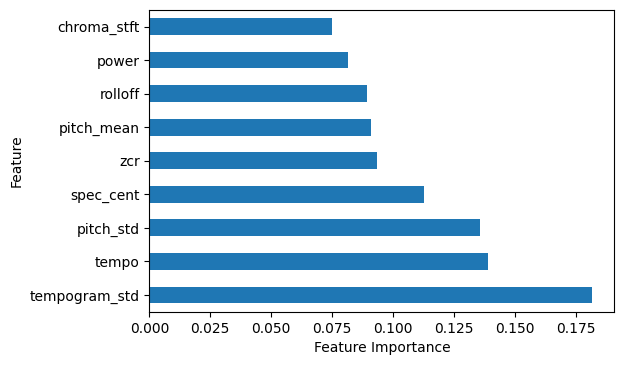

In [ ]:
from sklearn.ensemble import RandomForestClassifier
sc_exp = StandardScaler()
exp_X_norm = sc_exp.fit_transform(exp_X)

rfc = RandomForestClassifier()
rfc.fit(exp_X_norm, exp_y)

col_names = ['power','pitch_mean','pitch_std','tempogram_std','tempo','chroma_stft','spec_cent','rolloff','zcr']

importance = rfc.feature_importances_

plt.figure(dpi=100)
feat_importances = pd.Series(rfc.feature_importances_, index=col_names)
feat_importances.nlargest(9).plot(kind='barh')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()